# SPARKS FOUNDATION Task 4 

Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
As a security/defense analyst, try to find out the hot zone of terrorism.
What all security issues and insights you can derive by EDA?

IMPORTING REQUIRED PYTHON MODULES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

TERRORISM DATASET

In [2]:
terrorism_df = pd.read_csv("Global_Terrorism.csv", encoding ='latin1')
terrorism_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
terrorism_df.shape

(181691, 135)

INFO ABOUT THE TERRORISM DATASET

In [4]:
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


LIST OF THE COLUMNS IN TERRORISM DATASET

In [5]:
terrorism_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Selecting only required columns out of 135 columns and Renaming it for convenience

In [6]:
terrorism_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day', 'country_txt':'Country','provstate':'state',
                         'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','weapsubtype1_txt':'Weapon_subtype','motive':'Motive','suicide':'Suicide'},inplace=True)
terrorism_df['Casualities'] = terrorism_df.Killed + terrorism_df.Wounded
terrorism_df.columns

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY', 'related', 'Casualities'],
      dtype='object', length=136)

Basic Statistical information about the columns

In [7]:
terrorism_df.describe(include='all')

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Casualities
count,1.816910e+05,181691.000000,181691.000000,181691.000000,9239,181691.000000,2220,181691.000000,181691,181691.000000,...,115500,76933,43516,181691,181691.000000,181691.000000,181691.000000,181691.000000,25038,164817.000000
unique,NaN,NaN,NaN,NaN,2244,NaN,1859,NaN,205,NaN,...,83988,62263,36090,26,NaN,NaN,NaN,NaN,14306,NaN
top,NaN,NaN,NaN,NaN,"September 18-24, 2016",NaN,8/4/1998,NaN,Iraq,NaN,...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection,NaN,NaN,NaN,NaN,"201612010023, 201612010024, 201612010025, 2016...",NaN
freq,NaN,NaN,NaN,NaN,101,NaN,18,NaN,24636,NaN,...,205,134,139,78002,NaN,NaN,NaN,NaN,80,NaN
mean,2.002705e+11,2002.638997,6.467277,15.505644,NaN,0.045346,NaN,131.968501,NaN,7.160938,...,NaN,NaN,NaN,NaN,-4.543731,-4.464398,0.090010,-3.945952,NaN,5.296128
std,1.325957e+09,13.259430,3.388303,8.814045,NaN,0.208063,NaN,112.414535,NaN,2.933408,...,NaN,NaN,NaN,NaN,4.543547,4.637152,0.568457,4.691325,NaN,42.069023
min,1.970000e+11,1970.000000,0.000000,0.000000,NaN,0.000000,NaN,4.000000,NaN,1.000000,...,NaN,NaN,NaN,NaN,-9.000000,-9.000000,-9.000000,-9.000000,NaN,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,NaN,0.000000,NaN,78.000000,NaN,5.000000,...,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.000000,-9.000000,NaN,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,NaN,0.000000,NaN,98.000000,NaN,6.000000,...,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.000000,0.000000,NaN,1.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,NaN,0.000000,NaN,160.000000,NaN,10.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,4.000000


PERCENTAGE OF MISSING VALUES

In [8]:
missing_values=(((terrorism_df.isnull().sum()).sum())/terrorism_df.size)*100
missing_values

56.134700414116146

More than 50% of the values are NULL.

DATAFRAMES WITH NECESSARY COLUMNS ONLY

In [9]:

terrorism_df = terrorism_df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
                      'Wounded','Target','Summary','Group','Target_type','Weapon_type','Weapon_subtype','Motive','Suicide','Casualities']]
terrorism_df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,...,Wounded,Target,Summary,Group,Target_type,Weapon_type,Weapon_subtype,Motive,Suicide,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,...,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,NaN,0,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),...,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,NaN,0,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,...,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,NaN,0,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,...,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,Unknown Explosive Type,NaN,0,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,...,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN,0,NaN


In [10]:
terrorism_df['Wounded'] = terrorism_df['Wounded'].fillna(0).astype(int)
terrorism_df['Killed'] = terrorism_df['Killed'].fillna(0).astype(int)

In [11]:
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Country         181691 non-null  object 
 4   state           181270 non-null  object 
 5   Region          181691 non-null  object 
 6   city            181257 non-null  object 
 7   latitude        177135 non-null  float64
 8   longitude       177134 non-null  float64
 9   AttackType      181691 non-null  object 
 10  Killed          181691 non-null  int32  
 11  Wounded         181691 non-null  int32  
 12  Target          181055 non-null  object 
 13  Summary         115562 non-null  object 
 14  Group           181691 non-null  object 
 15  Target_type     181691 non-null  object 
 16  Weapon_type     181691 non-null  object 
 17  Weapon_sub

# Exploratory Data Analysis and Visualization

In [12]:
print(f"""
    There are {terrorism_df.Country.nunique()} countries from {terrorism_df.Region.nunique()} regions covered in the dataset and terrorist atacks data in {terrorism_df.Year.nunique()}
    years from {terrorism_df.Year.min()} to {terrorism_df.Year.max()}. Overally {terrorism_df.index.nunique()} terrorist attacks are recorded here which caused about {int(terrorism_df.Casualities.sum())} casualities
    consisted of {int(terrorism_df.Killed.sum())} kills and {int(terrorism_df.Wounded.sum())} wounded.
""")


    There are 205 countries from 12 regions covered in the dataset and terrorist atacks data in 47
    years from 1970 to 2017. Overally 181691 terrorist attacks are recorded here which caused about 872892 casualities
    consisted of 411868 kills and 523868 wounded.



NUMBER OF TERRORIST ACTIVITIES EACH YEAR

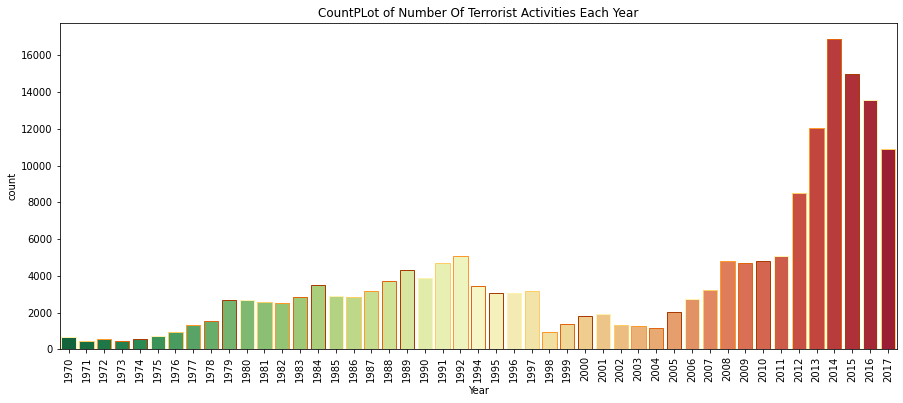

In [13]:
#Countplot
plt.subplots(figsize=(15,6))
sns.countplot('Year', data=terrorism_df, palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 5))
plt.xticks(rotation=90)
plt.title('CountPLot of Number Of Terrorist Activities Each Year')
plt.show()

This graphs shows:

2014 appears to be witness of a huge terrorist attacks.
2014 onwards recorded a large increase in attacks of terrorism.

TERRORIST ACTIVITIES BY REGION IN DIFFERENT YEARS

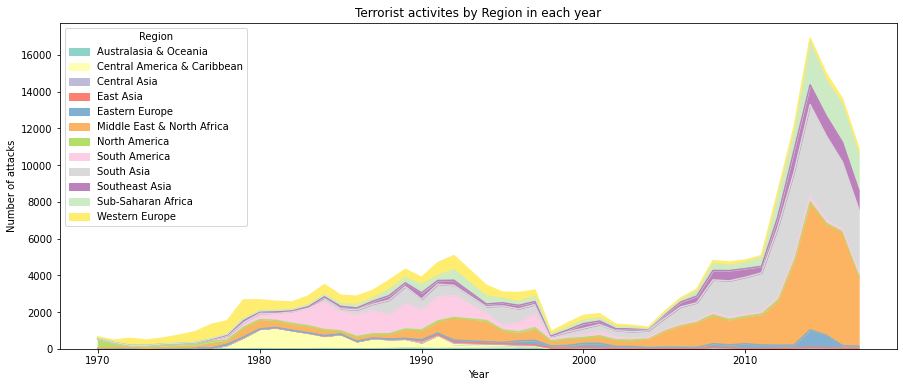

In [14]:
#Area plot
pd.crosstab(terrorism_df.Year,terrorism_df.Region).plot(kind='area',figsize=(15,6),colormap="Set3")
plt.title('Terrorist activites by Region in each year')
plt.ylabel("Number of attacks")
plt.show()

TOP COUNTRIES AFFECTED BT TERRORISM

In [15]:
attack_country = terrorism_df.Country.value_counts()[0:20]
attack_country

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

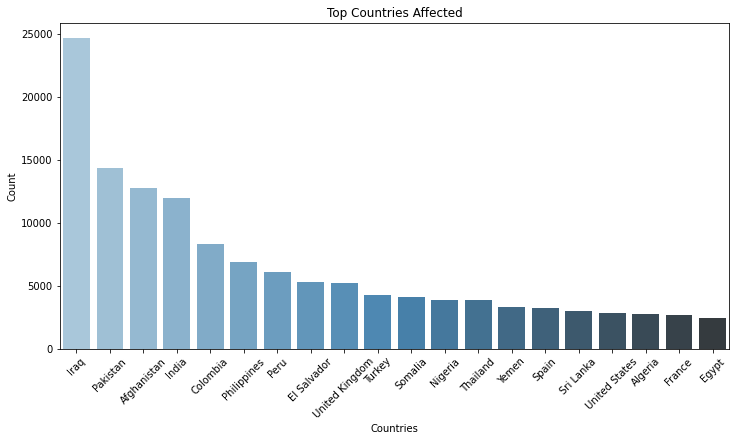

In [16]:

plt.subplots(figsize=(12,6))
sns.barplot(attack_country.index,attack_country.values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

GROUPS INVOLVING MOST IN TERRORISM

In [17]:
attack_groups = terrorism_df.Group.value_counts()[0:20]
attack_groups

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
National Liberation Army of Colombia (ELN)           1561
Tehrik-i-Taliban Pakistan (TTP)                      1351
Palestinians  

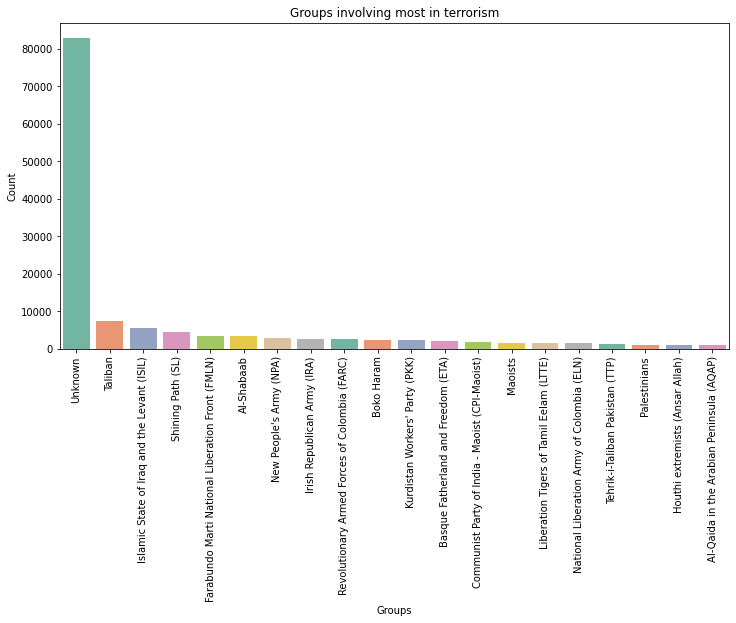

In [18]:
plt.subplots(figsize=(12,6))
sns.barplot(attack_groups.index,attack_groups.values,palette=sns.color_palette("Set2", 8))
plt.title('Groups involving most in terrorism')
plt.xlabel('Groups')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

NUMBER OF PEOPLE KILLED BY EACH TERRORISM GROUP

In [19]:

group_killed= terrorism_df[['Group','Killed']].groupby(['Group'],axis=0).sum().sort_values('Killed', ascending=False).head(20)
group_killed

,Killed
Group,
Unknown,112367
Islamic State of Iraq and the Levant (ISIL),38923
Taliban,29410
Boko Haram,20328
Shining Path (SL),11601
Liberation Tigers of Tamil Eelam (LTTE),10989
Al-Shabaab,9330
Farabundo Marti National Liberation Front (FMLN),8065
Nicaraguan Democratic Force (FDN),6662


NUMBER OF PEOPLE KILLED BY EACH GROUP IN TERRORIST ACTIVITY

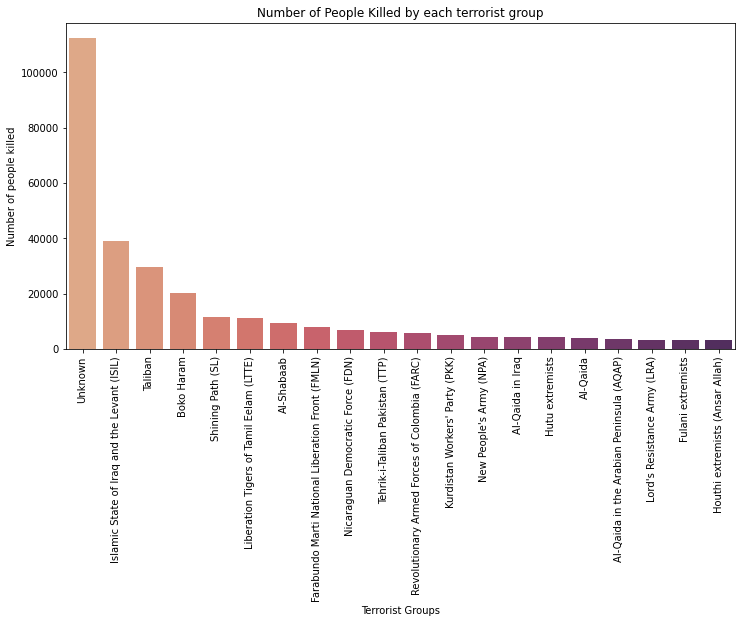

In [20]:
plt.subplots(figsize=(12,6))
sns.barplot(group_killed.index, group_killed.Killed.values,palette="flare")
plt.title('Number of People Killed by each terrorist group')
plt.xlabel('Terrorist Groups')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 90)
plt.show()

NUMBER OF PEOPLE DIED EACH YEAR 

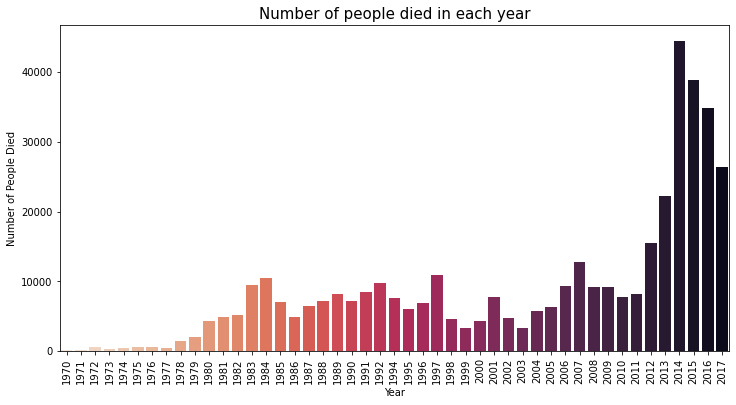

In [21]:
died_people = terrorism_df[['Year','Killed']].groupby(['Year']).sum()
plt.subplots(figsize=(12,6))
sns.barplot(died_people.index, died_people.Killed.values,palette="rocket_r")
plt.title("Number of people died in each year",fontsize=15)
plt.ylabel("Number of People Died")
plt.xlabel('Year')
plt.xticks(rotation = 90)
plt.show()

Number of deaths caused by terrorism is more between 2014 and 2018, with on an average >50K people being killed. High peak went to 2014 with 45K+ deaths.

TOP CITIES AFFECTED

In [22]:
attack_cities = terrorism_df.city.value_counts()[:15]
attack_cities

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Bogota           984
Kirkuk           925
Beirut           918
Medellin         848
Name: city, dtype: int64

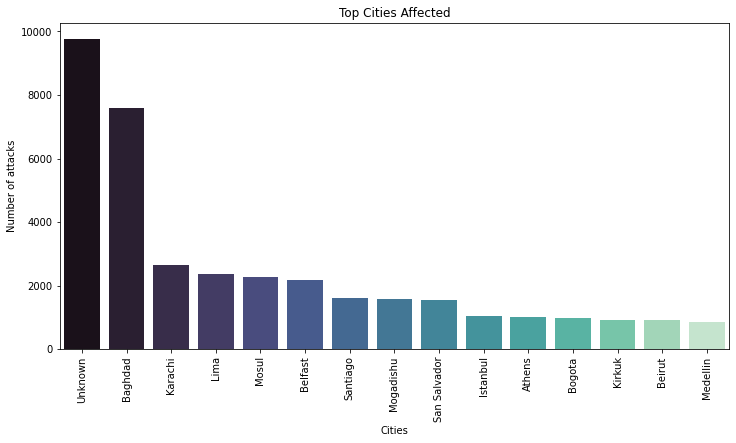

In [23]:
plt.subplots(figsize=(12,6))
sns.barplot(attack_cities.index,attack_cities.values,palette="mako")
plt.title('Top Cities Affected')
plt.xlabel('Cities')
plt.ylabel('Number of attacks')
plt.xticks(rotation= 90)
plt.show()

ATTACK TYPES

In [24]:
attack_type = terrorism_df.AttackType.value_counts()[:15]
attack_type

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

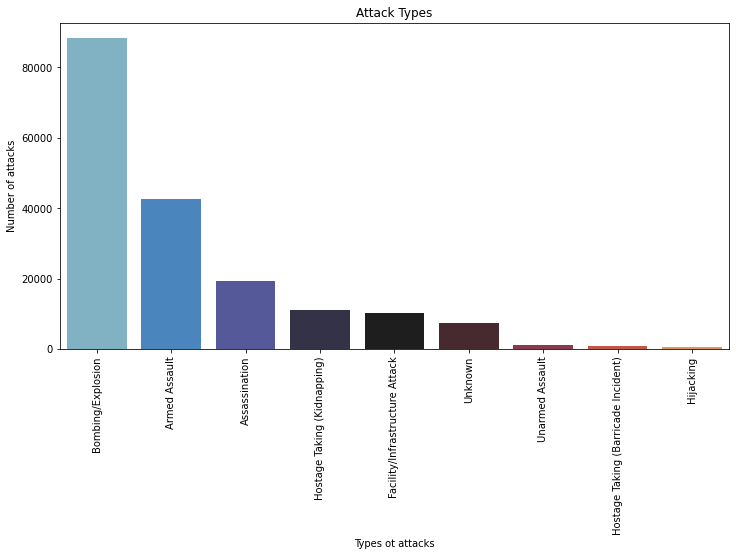

In [25]:
 
plt.subplots(figsize=(12,6))
sns.barplot(attack_type.index,attack_type.values,palette="icefire")
plt.title('Attack Types')
plt.xlabel('Types ot attacks')
plt.ylabel('Number of attacks')
plt.xticks(rotation= 90)
plt.show()

NUMBER OF PEOPLE KILLED IN EACH ATTACK TYPE

In [26]:
attack_killed = terrorism_df[['AttackType','Killed']].groupby(["AttackType"],axis=0).sum()
attack_killed

,Killed
AttackType,
Armed Assault,160297
Assassination,24920
Bombing/Explosion,157321
Facility/Infrastructure Attack,3642
Hijacking,3718
Hostage Taking (Barricade Incident),4478
Hostage Taking (Kidnapping),24231
Unarmed Assault,880
Unknown,32381


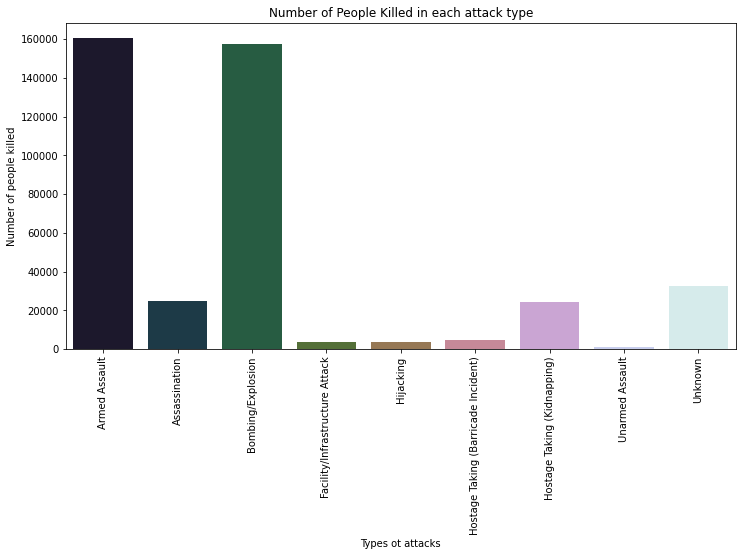

In [27]:
plt.subplots(figsize=(12,6))
sns.barplot(attack_killed.index, attack_killed.Killed.values,palette="cubehelix")
plt.title('Number of People Killed in each attack type')
plt.xlabel('Types ot attacks')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 90)
plt.show()

NUMBER OF PEOPLE WOUNDED IN EACH ATTACK TYPE

In [28]:
attack_wounded = terrorism_df[['AttackType','Wounded']].groupby(["AttackType"],axis=0).sum()
attack_wounded

,Wounded
AttackType,
Armed Assault,77365
Assassination,13887
Bombing/Explosion,372686
Facility/Infrastructure Attack,3765
Hijacking,17001
Hostage Taking (Barricade Incident),3966
Hostage Taking (Kidnapping),6446
Unarmed Assault,14027
Unknown,14725


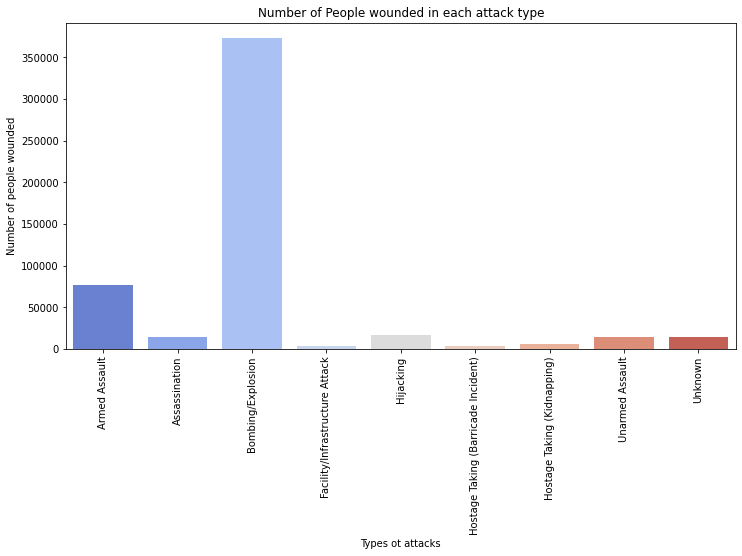

In [29]:

plt.subplots(figsize=(12,6))
sns.barplot(attack_wounded.index, attack_wounded.Wounded.values,palette="coolwarm")
plt.title('Number of People wounded in each attack type')
plt.xlabel('Types ot attacks')
plt.ylabel('Number of people wounded')
plt.xticks(rotation= 90)
plt.show()

SUICIDE ATTACKS EACH YEAR

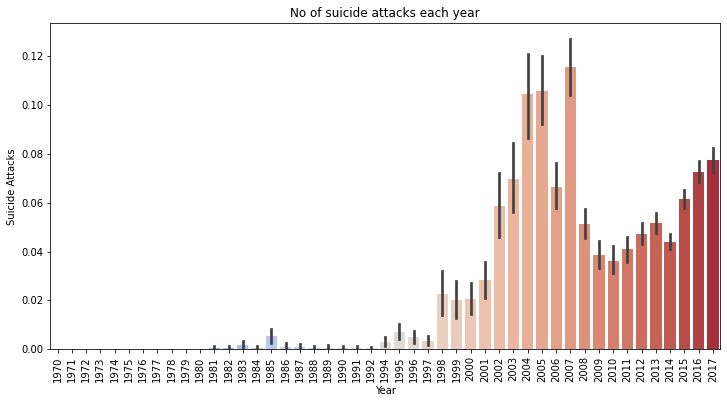

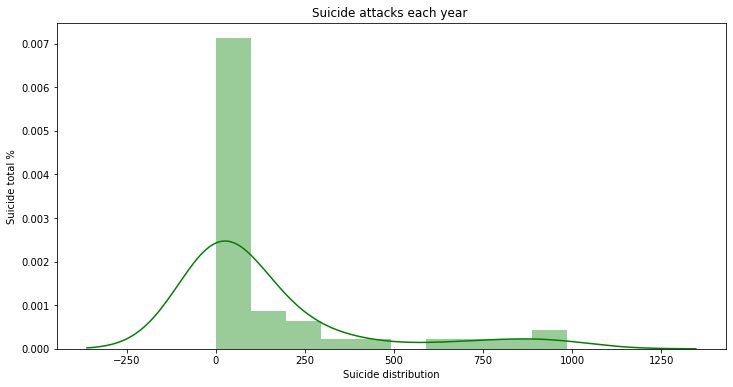

In [30]:
plt.subplots(figsize=(12,6))
sns.barplot(terrorism_df.Year, terrorism_df.Suicide.values,palette="coolwarm")
plt.title('No of suicide attacks each year')
plt.xlabel('Year')
plt.ylabel('Suicide Attacks')
plt.xticks(rotation= 90)
plt.show()

plt.figure(figsize=(12,6))
sns.distplot(terrorism_df[["Year","Suicide"]].groupby("Year").aggregate(np.sum), color = 'g')
plt.xlabel("Suicide distribution")
plt.ylabel("Suicide total %")
plt.title('Suicide attacks each year ')
plt.show()

COUNT OF DIFFERENT WEAPONS USED

In [31]:
weapons = terrorism_df['Weapon_type'].value_counts()
weapons = DataFrame(weapons)

weapons.reset_index(level=0, inplace=True)
weapons.columns = ['Weapon used', 'Weapon Count']
weapons

,Weapon used,Weapon Count
0,Explosives,92426
1,Firearms,58524
2,Unknown,15157
3,Incendiary,11135
4,Melee,3655
5,Chemical,321
6,Sabotage Equipment,141
7,Vehicle (not to include vehicle-borne explosiv...,136
8,Other,114
9,Biological,35


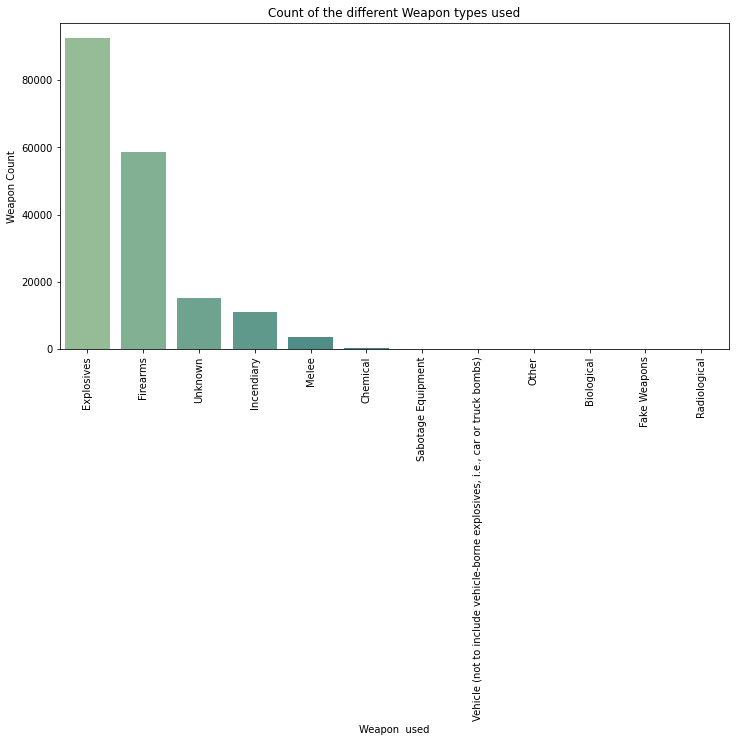

In [32]:
weapons = terrorism_df['Weapon_type'].value_counts()
plt.subplots(figsize=(12,6))
sns.barplot(weapons.index, weapons.values,palette="crest")
plt.title('Count of the different Weapon types used')
plt.xlabel('Weapon  used')
plt.ylabel('Weapon Count')
plt.xticks(rotation= 90)
plt.show()



COUNT OF DIFFERENT SUB WEAPONS USED

In [33]:
subweapons = terrorism_df['Weapon_subtype'].value_counts()
subweapons  = DataFrame(subweapons)

subweapons.reset_index(level=0, inplace=True)
subweapons.columns = ['Weapon sub type used', 'Weapon sub type Count']
subweapons


,Weapon sub type used,Weapon sub type Count
0,Unknown Explosive Type,44980
1,Unknown Gun Type,33137
2,Automatic or Semi-Automatic Rifle,17412
3,Vehicle,9900
4,"Projectile (rockets, mortars, RPGs, etc.)",9848
5,Other Explosive Type,7304
6,Handgun,6704
7,Grenade,5167
8,Landmine,4251
9,Arson/Fire,4141


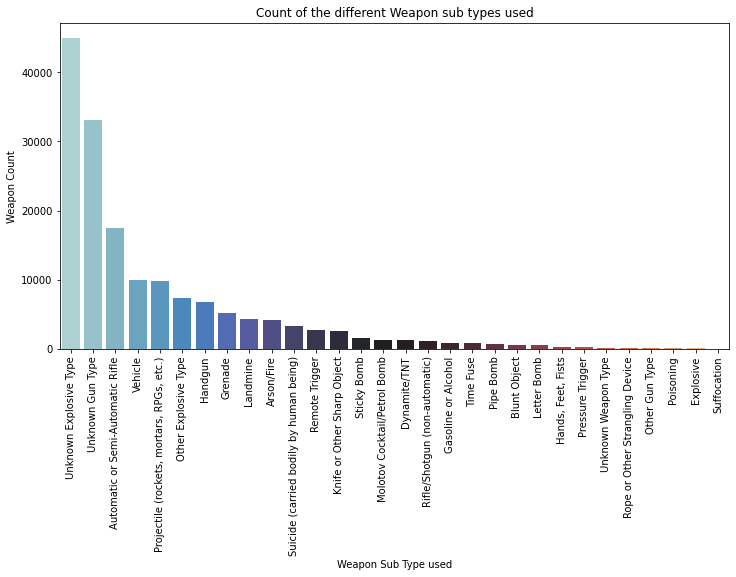

In [34]:

subweapons = terrorism_df['Weapon_subtype'].value_counts()
plt.subplots(figsize=(12,6))
sns.barplot(subweapons.index, subweapons.values,palette="icefire")
plt.title('Count of the different Weapon sub types used')
plt.xlabel('Weapon Sub Type used')
plt.ylabel('Weapon Count')
plt.xticks(rotation= 90)
plt.show()

NUMBER OF CASUALTIES EACH YEAR

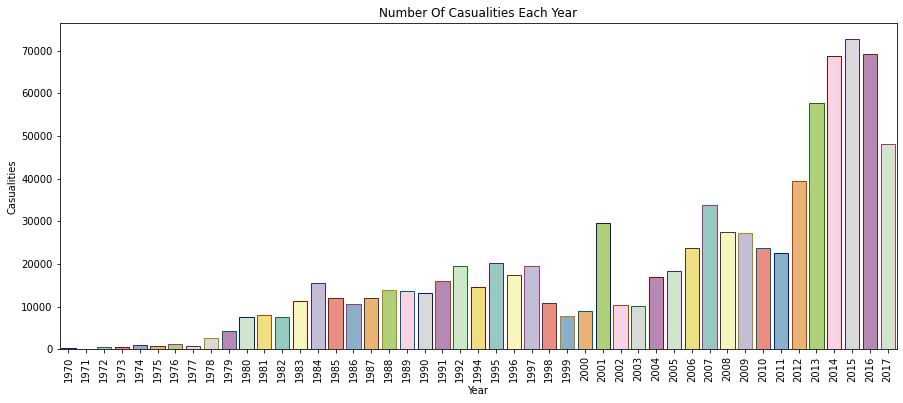

In [35]:
plt.subplots(figsize=(15,6))
year_cas = terrorism_df.groupby('Year').Casualities.sum().to_frame().reset_index()
year_cas.columns = ['Year','Casualities']
sns.barplot(x=year_cas.Year, y=year_cas.Casualities, palette='Set3',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Casualities Each Year')
plt.show()

NUMBER OF TOTAL CASUALITY IN EACH COUNTRY

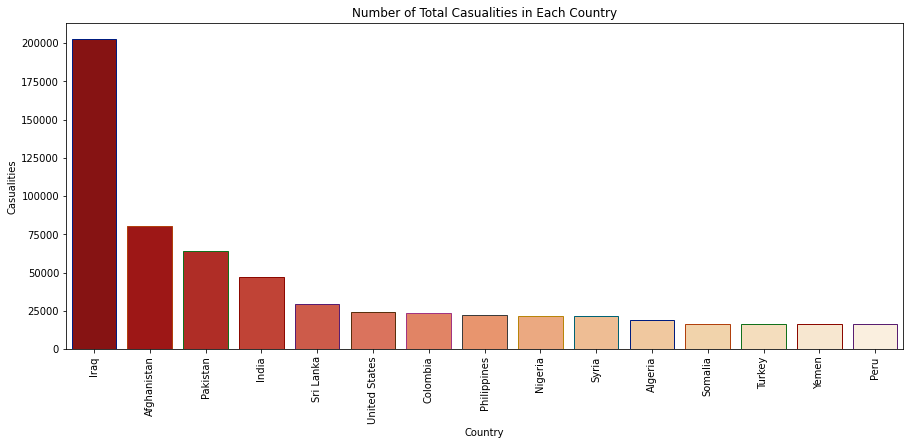

In [36]:
plt.subplots(figsize=(15,6))
count_cas = terrorism_df.groupby('Country').Casualities.sum().to_frame().reset_index().sort_values('Casualities', ascending=False)[:15]
sns.barplot(x=count_cas.Country, y=count_cas.Casualities, palette= 'OrRd_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number of Total Casualities in Each Country')
plt.show()

Casualty was most in the year 2015 and Iraq is found to be the country with most casualty

In [37]:

print('Country with most attacks: ',terrorism_df['Country'].value_counts().idxmax())
print('City with most attacks: ',terrorism_df['city'].value_counts().index[1])
print("Region with the most attacks:",terrorism_df['Region'].value_counts().idxmax())
print("Year with the most attacks:",terrorism_df['Year'].value_counts().idxmax())
print("Month with the most attacks:",terrorism_df['Month'].value_counts().idxmax())
print("Group with the most attacks:",terrorism_df['Group'].value_counts().index[1])
print("Most Attack Types:",terrorism_df['AttackType'].value_counts().idxmax())

Country with most attacks:  Iraq
City with most attacks:  Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion




# CONCLUSION:

After performing the Exploratory Data Analysis we get the following insights from the data:

Private Citizens and Property were attacked most followed by Military, Police, Government and so on.
Middle East & North Africa was most affected among the top affected region. Most of the people in this region were either wounded or killed.
Iraq was the country which was most affected by terror attacks and had maximum number of killed and wounded people.
The State and City that was most affected was Baghdad.
In the last decade 2014 had most number of terror attacks. That was around 16500 attacks during this year which means on average 45 attacks per day.
The most common attack type was Bombing/Explosion.
Explosives have been consistently the most popular weapon of choice for terrorists.
Taliban became more active since 2012 and they are responsible for the most of the terror attacks.


The Middle East & North African Regions need increased surveillance. A strict border policy should be implemented to prevent explosives from traveling between the regions.